# Task-1
ID u7101924

Name: Hongxiang Zhang

# 1-2

array([[ 7.44047619e-04,  0.00000000e+00, -2.85714286e-01],
       [ 0.00000000e+00,  7.44047619e-04, -2.14285714e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

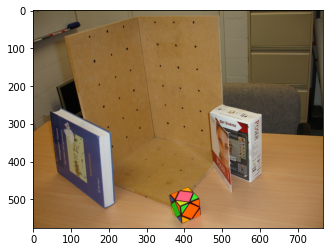

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
I = Image.open('stereo2012a.jpg');

plt.imshow(I)

# uv = plt.ginput(6) # Graphical user interface to get 6 points
uv = [[321, 335], [355, 298], [274, 263], [343, 406], [394, 257], [236,284]]
XYZ = np.array([[0,0,0],[7,7,0],[0,14,7],[14,0,14],[14,14,0],[0,14,14]])
im = np.array(I).astype('uint8')
center = np.array(im[:,:,0].shape)/2
inputuv = np.array(uv)
uv = [i-center for i in uv]

originxyz = [np.append(i,1) for i in XYZ]

h,w = im[:,:,0].shape
T_norm = np.array([[w+h,0,w/2],[0,w+h,h/2],[0,0,1]])
T_norm = np.linalg.inv(T_norm)
S_norm = np.zeros((4,4))
S_norm[-1,-1]=1
XYZ_mean,now = [0,0,0],np.zeros((3,3))
for i in XYZ:
    XYZ_mean = XYZ_mean+i
XYZ_mean = XYZ_mean/len(XYZ)
for i in XYZ:
    mat = np.mat(i - XYZ_mean)
    now = now + mat.T*mat
val,vec = np.linalg.eig(now)
S_norm[:3,:3] = np.diag(1/val)
S_norm[:3,3] = (np.diag(-1/val))@XYZ_mean

uv = [np.append(i,1) for i in uv]
XYZ = [np.append(i,1) for i in XYZ]

uv = [T_norm@i for i in uv]
XYZ = [S_norm@i for i in XYZ]

T_norm

# 3

In [5]:
#####################################################################
def calibrate(im, XYZ, uv):
    A = np.zeros((2*(len(XYZ)),12))
    for i in range(A.shape[0]):
        if i%2==0:
            tmp = np.array(XYZ[i//2])
            A[i,4:8] = (-1*tmp).copy()
            tmp2 = uv[i//2][1]*tmp
            A[i,8:] = tmp2.copy()
        else:
            A[i,:4] = tmp.copy()
            tmp2=(-1*tmp).copy()
            tmp2 = uv[i//2][0]*tmp2
            A[i,8:] = tmp2.copy()
    u,s,v = np.linalg.svd(A)
    C = v[-1]
    C = C.reshape(3,4)
    C = np.linalg.inv(T_norm)@C@S_norm
    return C
C = calibrate(im,XYZ,uv)
print("matrix P:",C)

matrix P: [[-1.69926167e+00  3.21130575e-01  1.40613179e+00 -1.03915956e+01]
 [-4.35367606e-01  1.87301768e+00 -1.08674559e+00  1.55109554e+01]
 [ 1.32685851e-03  1.21078926e-03  2.41171036e-03 -3.15885150e-01]]


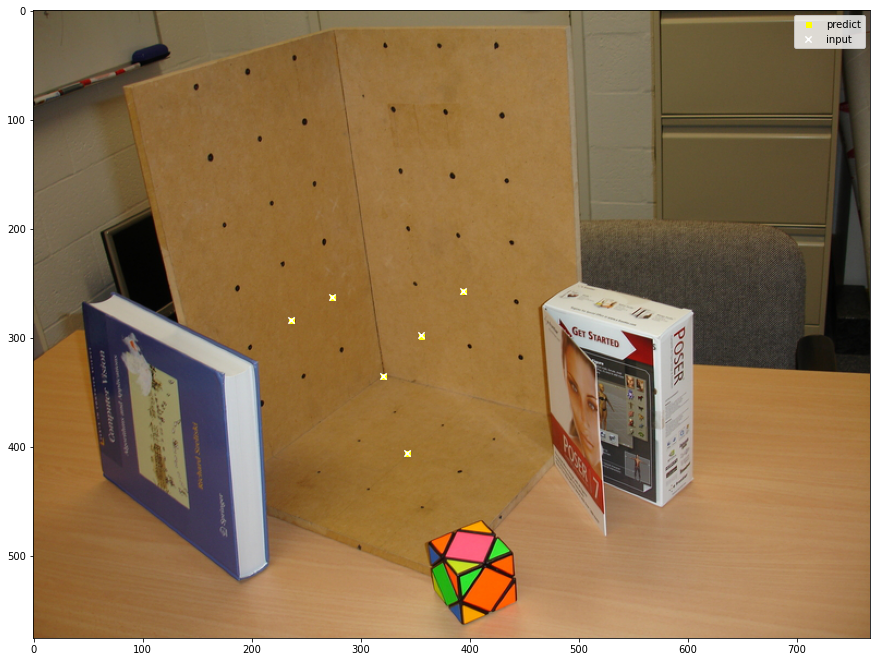

In [3]:
x,y=[],[]
for i in range(len(XYZ)):
    sb = originxyz[i].copy()
    sb = np.mat(sb).T

    ssb = C*sb
    ssb = ssb/ssb[2]
    x.append(ssb[0])
    y.append(ssb[1])
plt.figure(figsize=(15, 15))
plt.imshow(I)
x=x+center[0]
y=y+center[1]
plt.scatter(x,y,color='yellow',s=25,marker='s')
plt.scatter(inputuv[:,0],inputuv[:,1],color='white',s=40,marker='x')
plt.legend(['predict','input'])
# plt.savefig('dlt')

# 4

In [7]:
import vgg_KR_from_P as vgg
K, R, t = vgg.vgg_KR_from_P(C)
print()
print("matrix K:",K)
print()
print("matrix R:",R)
print()
print("matrix t:",t)

3 | [[-1.69926167e+00  3.21130575e-01  1.40613179e+00]
 [-4.35367606e-01  1.87301768e+00 -1.08674559e+00]
 [ 1.32685851e-03  1.21078926e-03  2.41171036e-03]]

matrix K: [[ 721.7261638    -4.53488275  168.67624332]
 [  -0.          727.26733597 -102.92671541]
 [  -0.           -0.            1.        ]]

matrix R: [[ 0.88693    -0.05960165 -0.45804239]
 [ 0.13662497 -0.91341695  0.38340982]
 [-0.44123554 -0.40263769 -0.80199382]]

matrix t: [62.77183476 48.22114397 72.23511016]


# 5

In [43]:
import math
-180*math.atan2(-1*R[2,0], math.sqrt( R[2,1]**2+R[2,2]**2 ) )/math.pi

-26.182739995507493

# 6

array([[160.5, 167.5],
       [177.5, 149. ],
       [137. , 131.5],
       [171.5, 203. ],
       [197. , 128.5],
       [118. , 142. ]])

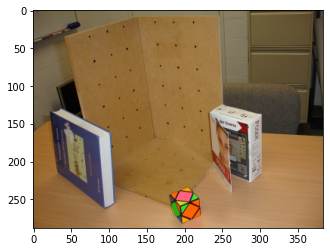

In [27]:
import cv2
size = (int(w*0.5), int(h*0.5))  
shrink = cv2.resize(im, size)
plt.imshow(shrink)
uv2 = inputuv.copy()
uv2 = uv2/2
uv2

In [7]:
# plt.savefig('shrink')

center = np.array(shrink[:,:,0].shape)/2
uv2 = [i-center for i in uv2]

h,w = shrink[:,:,0].shape
T_norm = np.array([[w+h,0,w/2],[0,w+h,h/2],[0,0,1]])
T_norm = np.linalg.inv(T_norm)
S_norm = np.zeros((4,4))
S_norm[-1,-1]=1

XYZ = np.array([[0,0,0],[7,7,0],[0,14,7],[14,0,14],[14,14,0],[0,14,14]])
XYZ_mean,now = [0,0,0],np.zeros((3,3))
for i in XYZ:
    XYZ_mean = XYZ_mean+i
XYZ_mean = XYZ_mean/len(XYZ)
for i in XYZ:
    mat = np.mat(i - XYZ_mean)
    now = now + mat.T*mat
val,vec = np.linalg.eig(now)
S_norm[:3,:3] = np.diag(1/val)
S_norm[:3,3] = (np.diag(-1/val))@XYZ_mean

uv2 = [np.append(i,1) for i in uv2]
XYZ = [np.append(i,1) for i in XYZ]

uv2 = [T_norm@i for i in uv2]
XYZ = [S_norm@i for i in XYZ]

C = calibrate(shrink,XYZ,uv2)

import vgg_KR_from_P as vgg
K, R, t = vgg.vgg_KR_from_P(C)
print()
print(K)
print()
print(R)
print()
print(t)

3 | [[-0.84963084  0.16056529  0.7030659 ]
 [-0.2176838   0.93650884 -0.54337279]
 [ 0.00132686  0.00121079  0.00241171]]

[[360.8630819   -2.26744137  84.33812166]
 [ -0.         363.63366798 -51.46335771]
 [ -0.          -0.           1.        ]]

[[ 0.88693    -0.05960165 -0.45804239]
 [ 0.13662497 -0.91341695  0.38340982]
 [-0.44123554 -0.40263769 -0.80199382]]

[62.77183476 48.22114397 72.23511016]


# Task-2 Two-View DLT based homography estimation

# 1

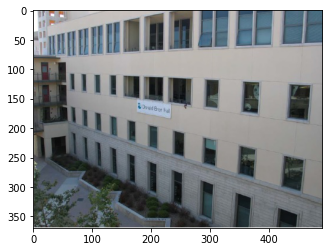

In [59]:
# vbase = [[270.52705627705626, 114.02380952380952], [256.51190476190476, 247.16774891774892], [152.3993506493506, 109.01839826839824], [158.40584415584414, 220.13852813852813], [233.48701298701297, 183.09848484848484], [174.42316017316017, 173.08766233766232]]
vbase = [[315.57575757575756, 116.025974025974], [232.4859307359307, 184.09956709956708], [310.57034632034635, 266.1883116883117], [129.3744588744588, 108.01731601731598], [174.42316017316017, 172.08658008658008], [129.3744588744588, 210.12770562770564]]
# vtrans = [[317.5779220779221, 146.05844155844153], [307.56709956709955, 250.17099567099567], [168.41666666666663, 146.05844155844153], [180.42965367965365, 250.17099567099567], [282.5400432900433, 203.12012987012986], [207.45887445887445, 203.12012987012986]]
vtrans = [[360.62445887445887, 148.06060606060606], [283.54112554112555, 203.12012987012986], [359.62337662337666, 249.16991341991343], [128.3733766233766, 148.06060606060606], [206.45779220779218, 203.12012987012986], [130.37554112554108, 250.17099567099567]]
inputr = np.array(vtrans)
inputl = np.array(vbase)

I = Image.open('left.jpg');
im = np.array(I).astype('uint8')
plt.imshow(im)

originu = [np.append(i,1) for i in vbase]

h,w = im[:,:,0].shape
T_norm = np.array([[w+h,0,w/2],[0,w+h,h/2],[0,0,1]])
T_norm = np.linalg.inv(T_norm)

ubase = [np.append(i,1) for i in vbase]
utrans = [np.append(i,1) for i in vtrans]
ubase = [T_norm@i for i in ubase]
utrans = [T_norm@i for i in utrans]

# 2

In [60]:
def homography(u2Trans, v2Trans, uBase, vBase):
    A = np.zeros((2*(len(vbase)),9))
    for i in range(A.shape[0]):
        if i%2==0:
            tmp = np.array(uBase[i//2])
            A[i,3:6] = (-1*tmp).copy()
            A[i,5]=-1
            
            tmp2 = u2Trans[i//2][1]*tmp
            A[i,6:9] = tmp2.copy()
            
            A[i,8] = u2Trans[i//2][1]
        else:
            A[i,:3] = tmp.copy()
            A[i,2] = 1
            
            tmp2=(-1*tmp).copy()
            tmp2 = u2Trans[i//2][0]*tmp2
            A[i,6:9] = tmp2.copy()
            A[i,8] = -1*u2Trans[i//2][0]

    u,s,v = np.linalg.svd(A)
    C = v[-1]
    C = C.reshape(3,3)
    C = np.linalg.inv(T_norm)@C@T_norm
    return C
C = homography(utrans, vtrans, ubase, vbase)
print('matrix H:',C)

matrix H: [[ 6.73535674e-01  2.59037318e-03 -4.95499274e+01]
 [ 1.15680640e-01  2.94161623e-01 -3.50906455e+00]
 [ 8.52294633e-04 -1.98196967e-05  1.85980584e-01]]


In [61]:
originu

[array([315.57575758, 116.02597403,   1.        ]),
 array([232.48593074, 184.0995671 ,   1.        ]),
 array([310.57034632, 266.18831169,   1.        ]),
 array([129.37445887, 108.01731602,   1.        ]),
 array([174.42316017, 172.08658009,   1.        ]),
 array([129.37445887, 210.12770563,   1.        ])]

In [62]:
sb = originu[0].copy()
print(sb)
sb = np.mat(sb).T
ssb = C*sb
ssb = ssb/ssb[2]
ssb

[315.57575758 116.02597403   1.        ]


matrix([[360.77352268],
        [148.30032981],
        [  1.        ]])

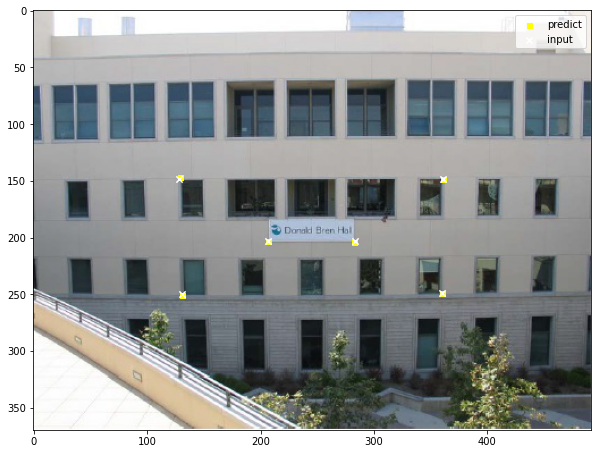

In [63]:
x,y=[],[]

for i in range(len(vbase)):
    sb = originu[i].copy()
    sb = np.mat(sb).T
    ssb = C*sb
#     print(ssb)
    ssb = ssb/ssb[2]
    x.append(ssb[0])
    y.append(ssb[1])
plt.figure(figsize=(10, 10))
hell = Image.open('right.jpg');
plt.imshow(hell)

plt.scatter(x,y,color='yellow',s=25,marker='s')
plt.scatter(inputr[:,0],inputr[:,1],color='white',s=40,marker='x')
plt.legend(['predict','input'])
# plt.savefig('afterdlt')

# 3

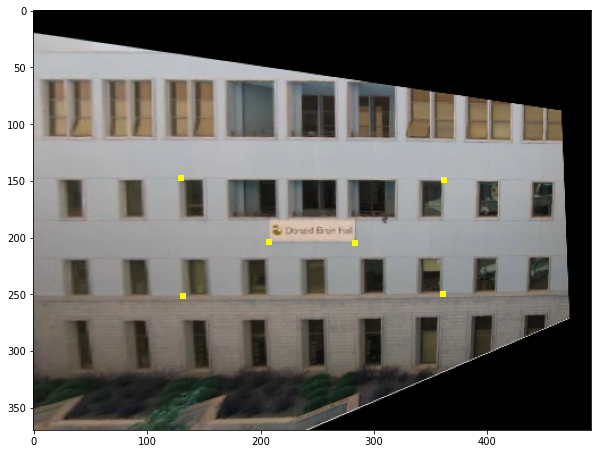

In [67]:
img = cv2.imread('left.jpg');
plt.figure(figsize=(10, 10))
nw = cv2.warpPerspective(img,C,(w,h))
plt.imshow(nw)
plt.scatter(x,y,color='yellow',s=25,marker='s')
plt.savefig('wraped2')

In [65]:
xx = np.array(x)
xx= [i[0,0] for i in xx]
yy = np.array(y)
yy= [i[0,0] for i in yy]
yy

tmp = inputr.copy()
tmp[:,0]-=xx
tmp[:,1]-=yy
tmp


array([[-0.1490638 , -0.23972375],
       [ 0.96383233, -0.67620952],
       [-0.32048717,  0.58496053],
       [-0.38406677,  1.06676467],
       [ 0.02690576, -0.03062922],
       [-0.17963236, -0.6790911 ]])

In [66]:
for i in tmp:
    print(np.linalg.norm(i))

0.2822897315796688
1.1773835682240874
0.6670013865970991
1.1337963387135694
0.04076848450723069
0.7024475138312357
